In [0]:
import numpy as np

In [0]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
Y = np.array([[1],[0],[0],[1]])

In [0]:
hiddenWt = np.array([[0.1,0.3],[-0.2,0.4]]).reshape(2,2)
hiddenBias = np.array([0.1,-0.2]).reshape(1,2)
outputWt = np.array([0.2,-0.1]).reshape(2,1)
outputBias = np.array([-0.1]).reshape(1,1)

In [0]:
def activation(val):
  ans=np.exp(-val)+1
  return 1/ans

In [0]:
def forDelta(val):
  ans=val*(1-val)
  return ans

In [0]:
def optimizeWeights(X,Y,hiddenWt,hiddenBias,outputWt,outputBias,epochs,alpha):

  for i in range(epochs):
    product=np.add(np.dot(X,hiddenWt),hiddenBias)
    outputHiddenLayer = activation(product)

    product=np.add(np.dot(outputHiddenLayer,outputWt),outputBias)
    finalOutput= activation(product)

    errorTotal = np.subtract(Y,finalOutput)
    deltaOutput = errorTotal * forDelta(finalOutput)

    errorHidden=np.dot(deltaOutput,outputWt.T)
    deltaHidden=errorHidden*forDelta(outputHiddenLayer)

    outputWt += np.dot(outputHiddenLayer.T,deltaOutput) * alpha
    outputBias += np.sum(deltaOutput,axis=0,keepdims=True) * alpha
    hiddenWt += np.dot(X.T,deltaHidden) * alpha
    hiddenBias += np.sum(deltaHidden,axis=0,keepdims=True) * alpha

  return finalOutput

In [0]:
epochs=1000000
alpha=0.1
finalOutput = optimizeWeights(X,Y,hiddenWt,hiddenBias,outputWt,outputBias,epochs,alpha)

In [23]:
print("Final weights of Hidden Layer: ",hiddenWt)
print("Final biases of hidden Layer: ",hiddenBias)
print("Final weights of outpu Layer: ",outputWt)
print("Final biases of output Layer: ",outputBias)

print("Output Matrix obtained from the back propagation neural network: ")
print(finalOutput)

Final weights of Hidden Layer:  [[5.52857999 7.33104356]
 [5.52669798 7.32369793]]
Final biases of hidden Layer:  [[-8.46235479 -3.357403  ]]
Final weights of outpu Layer:  [[ 13.21980673]
 [-12.5611388 ]]
Final biases of output Layer:  [[5.95293105]]
Output Matrix obtained from the back propagation neural network: 
[[0.99606145]
 [0.00330782]
 [0.00330622]
 [0.99663755]]


In [0]:
import matplotlib.pyplot as plt

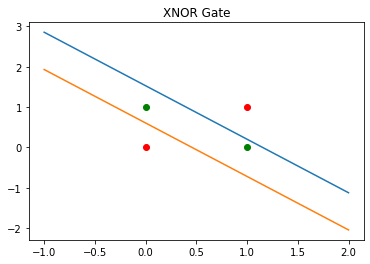

In [25]:
x = np.linspace(-1, 2, 40)
plt.plot(x,(x*hiddenWt[0][1]+hiddenBias[0][0])/(-1*hiddenWt[0][0]))
plt.plot(x,(x*hiddenWt[1][1]+hiddenBias[0][1])/(-1*hiddenWt[1][0]))
for i in range(len(Y)):
  if(Y[i][0]==0):
    plt.scatter(X[i,0],X[i,1],color='green')
  else:
    plt.scatter(X[i,0],X[i,1],color='red')
plt.title("XNOR Gate")
plt.show()

Here the **green dots** represent the output value **0** and the **red dots** represent the ouput value **1**.

The above network can easily be verified by this graph. **The lines plotted using the weights and biases obtained by the network, seggregate the red and green points**. The area between the lines represent the area where output is 0 and the area left represent the area with output 1

Also the output matrix obtained by the function optimizedWeights can also be used to test this network. In this matrix, for input values whose expected output is 1, the values obtained are close to 1.
Similarly for expected value 0, the obtained output values are close to 0.

So, we can conclude that the network is working correctly.